In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [46]:
img = cv2.imread("tiger.png")
cv2.imshow("tiger", img)
img.shape

(335, 583, 3)

#function1


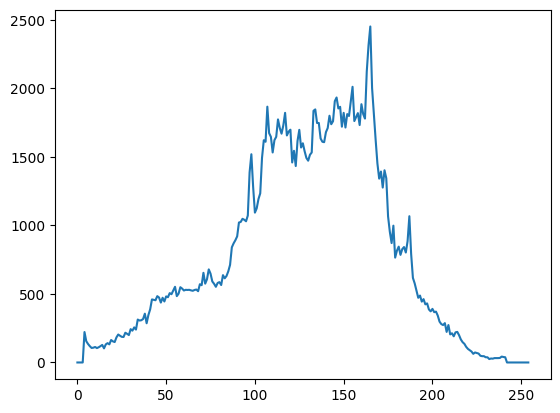

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(3,3),0)
hist = cv2.calcHist([blur],[0],None,[255],[0,255])
plt.plot(hist)


#function2

In [10]:
circle = cv2.circle( img, (img.shape[1]//2,img.shape[0]//2), img.shape[1]//2,(0,0,255),thickness=8)
text = cv2.putText(circle, "Tiger", (circle.shape[1]//2,img.shape[0]//2),cv2.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0),2)
cropped = text[img.shape[0]//4:img.shape[0]//2, :,:]
cv2.imshow("cropped image" , cropped)

#function3

In [32]:
blank = np.zeros((img.shape[1], img.shape[0],3), dtype=np.uint8)
rectangle = cv2.rectangle(blank, (0,0), (int(img.shape[1]//1.5), int(img.shape[0]//1.5)), (0,0,255), 4)
flipped = cv2.flip(img, 1)
masked = cv2.bitwise_and(flipped,flipped , rectangle)
cv2.imshow("masked image", masked)

#function4

In [42]:
thresh2 , thresh = cv2.threshold(img, 125 , 255, cv2.THRESH_BINARY)
def rotate( fig , angle, rotPoint=None):
    (height , width) = img.shape[:2]
    if rotPoint is None:
        rotPoint=(width//2, height//2)
    rotMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions=(width,height)
    return cv2.warpAffine(fig, rotMat, dimensions)

rotated = rotate(thresh , 30)
cv2.imshow("Rotation of a Threshold image", rotated)

#function5

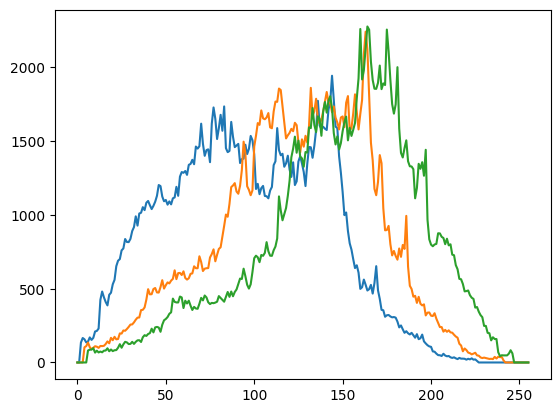

In [49]:
blur = cv2.GaussianBlur(img , (5,5), 0)
sobelx = cv2.Sobel(blur , cv2.CV_64F, 1 , 0)
sobely = cv2.Sobel(blur,cv2.CV_64F , 0 , 1)
combined = cv2.bitwise_or(sobelx, sobely)
for i in range(0,3):
    hist= cv2.calcHist([blur],[i],None, [256],[0,255])
    plt.plot(hist)